One Class Diagonal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static lp as classifier
Execution time:  0.3231825104742272
Average MCC:  0.9862960827729657
Average error: 0.6856999999999971
Average macro-F1: 0.9930348649093043
Average micro-F1: 0.9931
Acurácia Média:  99.3143
Desvio Padrão:  0.6709146816101118
Variância:  0.4501265099999977


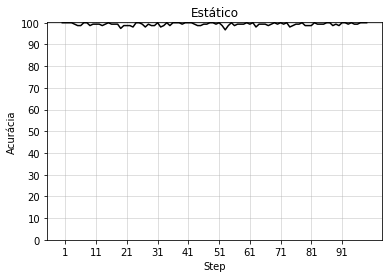

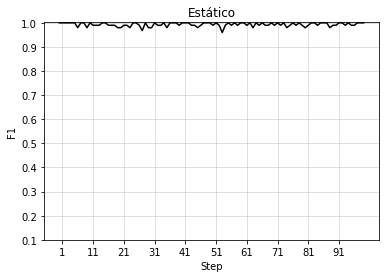




METHOD: Sliding lp as classifier
Execution time:  0.36077745186800625
Average MCC:  0.9962539847333237
Average error: 0.2500999999999891
Average macro-F1: 0.9979960329836232
Average micro-F1: 0.9980000000000001
Acurácia Média:  99.74990000000001
Desvio Padrão:  1.3443887049510639
Variância:  1.8073809899999986


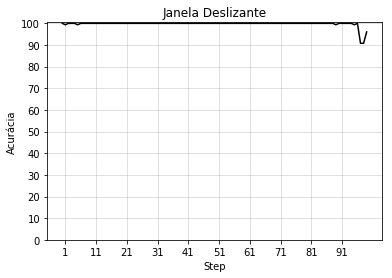

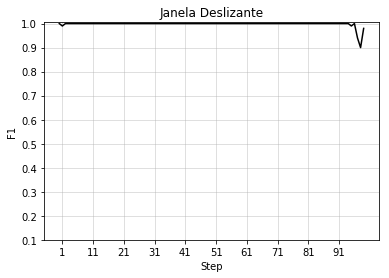




METHOD: Incremental lp as classifier
Execution time:  3.4401396086739755
Average MCC:  0.9912402777760596
Average error: 0.4221999999999895
Average macro-F1: 0.9955620290896003
Average micro-F1: 0.9956
Acurácia Média:  99.57780000000001
Desvio Padrão:  0.5234320968377845
Variância:  0.2739811599999998


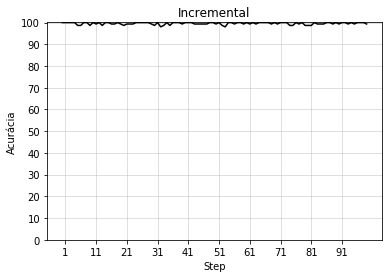

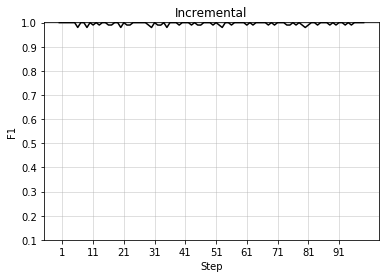




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.5052500985141855
Average MCC:  0.9996025035112601
Average error: 0.01979999999998938
Average macro-F1: 0.9997992569606109
Average micro-F1: 0.9998
Acurácia Média:  99.98020000000001
Desvio Padrão:  0.1125875659209329
Variância:  0.012675960000000411


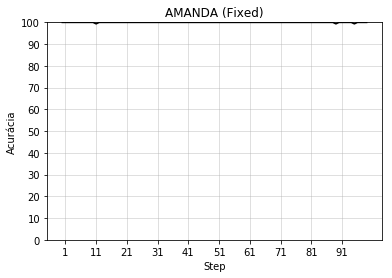

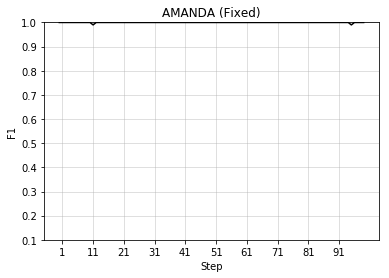




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.25 | Std keeping percentage=0.15
Execution time:  0.5494416803798625
Average MCC:  0.9982166864833681
Average error: 0.0724999999999767
Average macro-F1: 0.9990913361130164
Average micro-F1: 0.9991
Acurácia Média:  99.92750000000002
Desvio Padrão:  0.2776918255908887
Variância:  0.07711275000000054


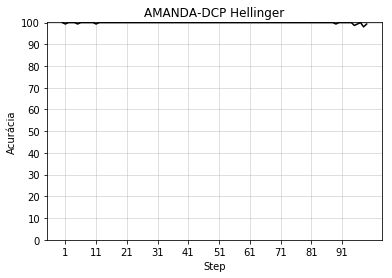

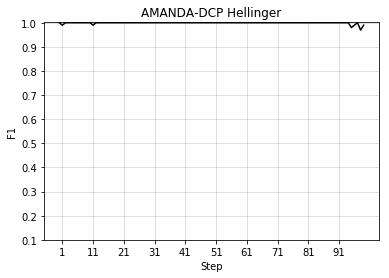




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.31 | Std keeping percentage=0.06
Execution time:  0.557314417780387
Average MCC:  0.9996053660051476
Average error: 0.039499999999989654
Average macro-F1: 0.9997987117552336
Average micro-F1: 0.9998
Acurácia Média:  99.96050000000001
Desvio Padrão:  0.2429583297604754
Variância:  0.05902874999999991


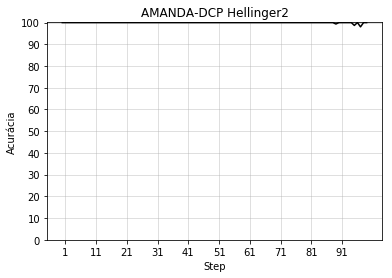

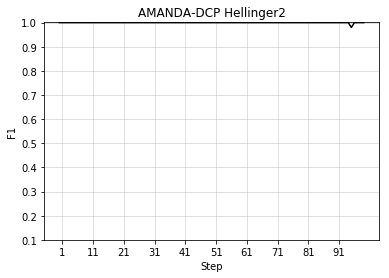




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.21 | Std keeping percentage=0.08
Execution time:  0.5083307078434718
Average MCC:  0.9994039922956202
Average error: 0.0461999999999847
Average macro-F1: 0.9996990063340445
Average micro-F1: 0.9997
Acurácia Média:  99.95380000000002
Desvio Padrão:  0.1925345683247569
Variância:  0.03706956000000049


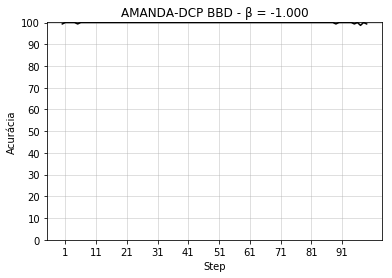

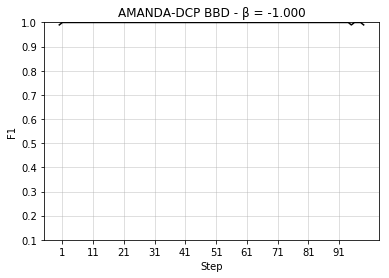

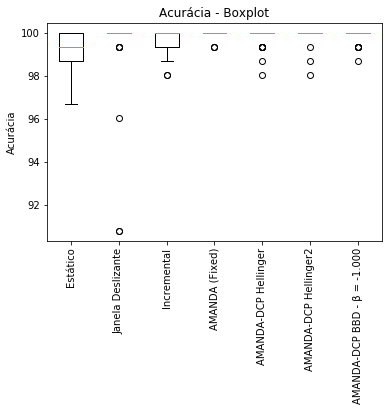

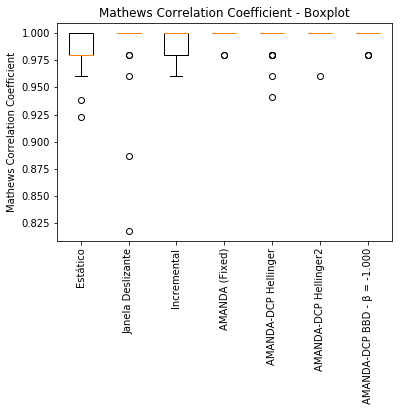

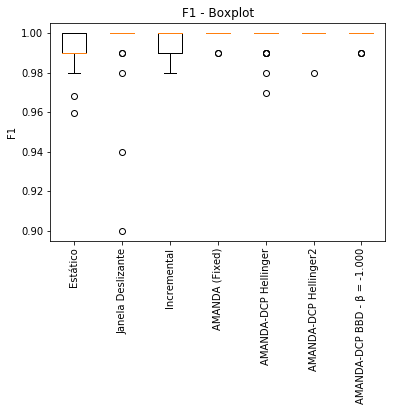

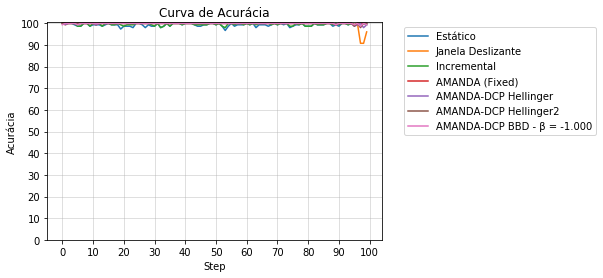

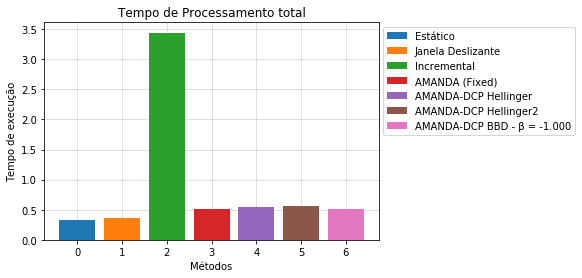

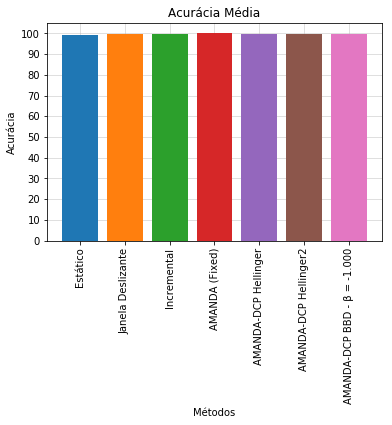

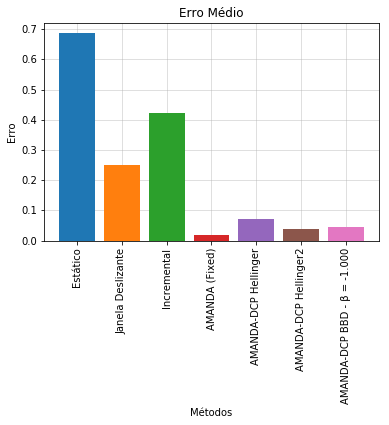

Pos 5 - Redução do Erro (Janela Deslizante):0.43860753184587514
Pos 6 - Redução do Erro (Incremental):0.2653192944017202
Pos 1 - Redução do Erro (AMANDA (Fixed)):0.6704976020573147
Pos 4 - Redução do Erro (AMANDA-DCP Hellinger):0.617433743176985
Pos 2 - Redução do Erro (AMANDA-DCP Hellinger2):0.6506615864986285
Pos 3 - Redução do Erro (AMANDA-DCP BBD - β = -1.000):0.6439153273999941


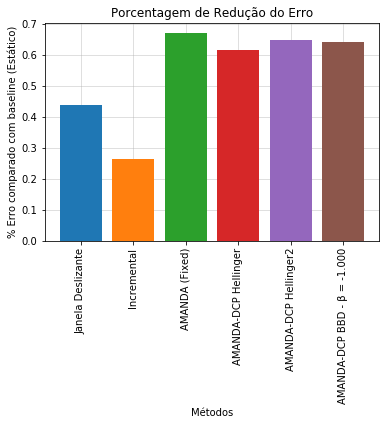

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
import numpy as np
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
#from methods import lstm


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ np.asarray(predictions[i::steps]) for i in range(steps) ]
    
    #print("predictions",np.shape(predictions))
    #print("originalAccs",key,originalAccs[key])
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCDT(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))
    #'''
    # Static SSL
    experiments[0] = Experiment(static_classifier, 4, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 4, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 4, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 4, 0.85, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 4, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 4, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1]
    bestK = [2]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'HDDDM')

    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 2)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CDT', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    #'''
    # Upper-bound
    #experiments[6] = Experiment(lstm, 2)
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()